# Есептер Апта 14
## 🟢 1-деңгей. Негізгі (Basic)
### Тапсырма 1. Тензорлармен жұмыс

In [ ]:
import torch 

In [2]:
# 1 
zeros_ten = torch.zeros(3, 4)
print(zeros_ten)

# 2 
ones_ten = torch.ones(4,3)
print(ones_ten)

# 3 
result = torch.matmul(zeros_ten, ones_ten)
print(result)

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])


### Тапсырма 2. Арифметикалық операциялар

In [3]:
a = torch.tensor([2.0, 4.0, 6.0])
b = torch.tensor([1.0, 3.0, 5.0])

sum =   a + b 
mul = a * b 
dot = torch.dot(a,b)

print(f' Sum: {sum}\n Multiple: {mul}\n Dot: {dot}')

 Sum: tensor([ 3.,  7., 11.])
 Multiple: tensor([ 2., 12., 30.])
 Dot: 44.0


### Тапсырма 3. Shape және reshape


In [ ]:
rand_tensor = torch.rand(2, 6)

reshaped = rand_tensor.reshape(3,4)

transposed = reshaped.T

print(f" Random: \n{rand_tensor}\n\n Reshaped: \n{reshaped}\n\n Tranposed: \n{transposed}")

[
    [1, 2]
    [3, 4]
]

[1, 3]
[2, 4]

 Random: 
tensor([[0.3521, 0.1282, 0.6800, 0.4426, 0.1937, 0.2617],
        [0.6353, 0.4318, 0.7690, 0.8827, 0.4165, 0.3136]])

 Reshaped: 
tensor([[0.3521, 0.1282, 0.6800, 0.4426],
        [0.1937, 0.2617, 0.6353, 0.4318],
        [0.7690, 0.8827, 0.4165, 0.3136]])

 Tranposed: 
tensor([[0.3521, 0.1937, 0.7690],
        [0.1282, 0.2617, 0.8827],
        [0.6800, 0.6353, 0.4165],
        [0.4426, 0.4318, 0.3136]])


# 2-деңгей. Орташа (Intermediate)

### Тапсырма 4. Автоматты дифференция

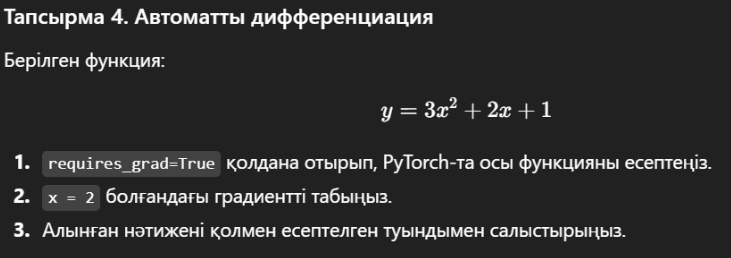

In [5]:
x = torch.tensor(2.0, requires_grad=True)
y = 3 * x**2 + 2 * x + 1 

y.backward()
print(f"Gradient PyTroch: {x.grad}")


Gradient PyTroch: 14.0


###
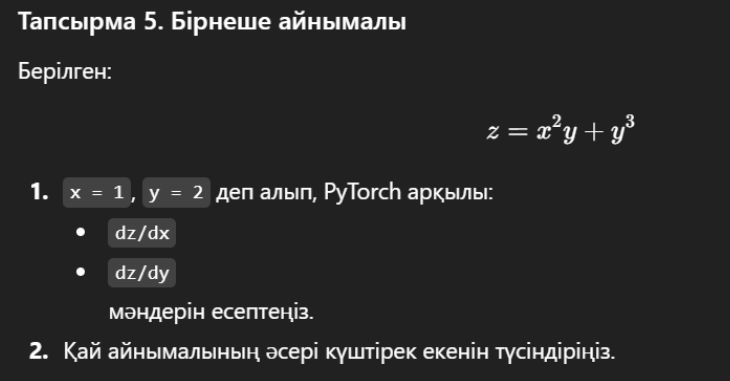

In [7]:
x = torch.tensor(1.0, requires_grad=True)
y = torch.tensor(2.0, requires_grad=True) 

z = (x**2 * y) + y**2
z.backward()

print(f"dz/dx: {x.grad}, dz/dy {y.grad}")

dz/dx: 4.0, dz/dy 5.0


##

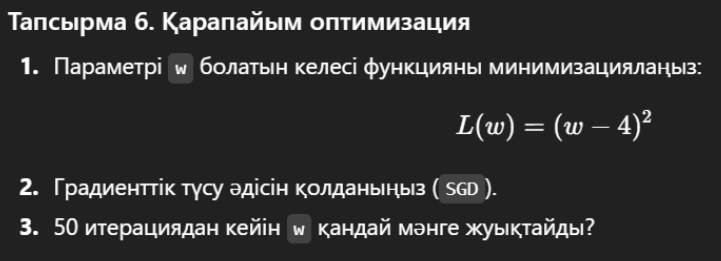

In [9]:
w = torch.tensor([0.0], requires_grad=True)
optimizer = torch.optim.SGD([w], lr=0.1)

for _ in range(50):
    loss = (w - 4)**2 
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f"Final w: {w.item()}")

Final w: 3.9999430179595947


# 3-деңгей. Advanced

## 
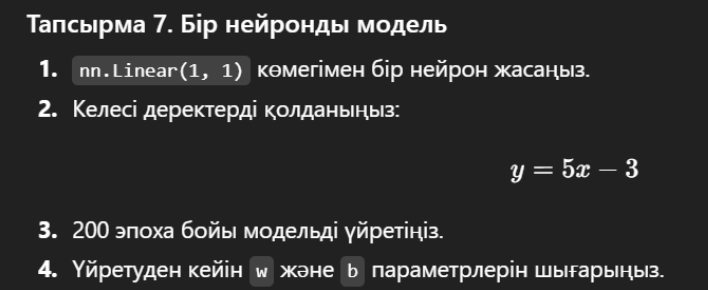

In [20]:
import torch.nn as nn 

model = nn.Linear(1,1)

x_train = torch.tensor([[1.0], [2.0], [3.0], [4.0]])
y_train = 5 * x_train - 3 

optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
criterion = nn.MSELoss()

for epoch in range(200):
    pred = model(x_train)
    loss = criterion(pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f"w: {model.weight.item()},  b: {model.bias.item()}")

w: 4.996211051940918,  b: -2.988860845565796


## Тапсырма 8. Loss функцияны салыстыру
Бір деректер жиыны үшін:


MSELoss

L1Loss


Екі loss функциясымен модельді жеке-жеке үйретіңіз.

Қайсысы тезірек convergence береді? Неліктен?


In [29]:
model_l1 = nn.Linear(1,1)
criterion_l1 = nn.L1Loss()
optimizer_l1 = torch.optim.SGD(model_l1.parameters(), lr=0.1)

for epoch in range(200):
    outputs_l1 = model_l1(x_train)
    loss_l1 = criterion_l1(outputs_l1, y_train)
    optimizer_l1.zero_grad()
    loss_l1.backward()
    optimizer_l1.step()

print(f"L1 ->  w: {model_l1.weight.item()},  b: {model_l1.bias.item()}")


L1 ->  w: 4.659599781036377,  b: -2.67922043800354


##

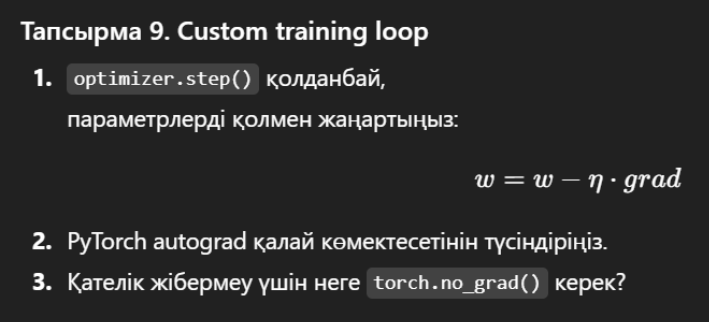

In [31]:
x = torch.tensor([1.0, 2.0], dtype=torch.float32)
y_true = torch.tensor([5.0, 3.0], dtype=torch.float32)
w = torch.tensor([0.0], requires_grad=True)
lr = 0.1 

y_pred = x * w 
loss = torch.mean((y_pred - y_true)**2)
loss.backward()

with torch.no_grad():
    w -= lr * w.grad
    w.grad.zero_()

    print(f"Update w: {w.item()}")


Update w: 1.100000023841858


##
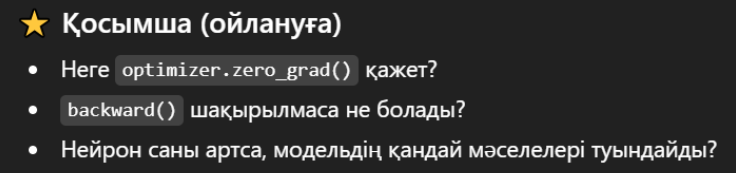